<a href="https://colab.research.google.com/github/RAAHUL-S/Data-Science-Projects/blob/main/Air_India_Flight_Crash_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install pandas matplotlib textblob
! python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from textblob import TextBlob

In [18]:
sns.set_theme(style="whitegrid")

**Data Setup**

In [19]:
common_data = {
    "Total_People_Onboard": [242],
    "Passengers": [230],
    "Crew": [12],
    "Death_Toll_Reported": [265],
    "Confirmed_Deaths": [241],
    "Survivors": [1],
    "Altitude_at_Crash_Feet": [425],
    "Captain_Flight_Hours": [8200],
    "Co_Pilot_Flight_Hours": [1100],
    "Required_Hours_for_Commander": [1500],
    "NDRF_Teams_Deployed": [6],
    "Bodies_Handed_Over": [6],
    "Assistance_Centers_Count": [4],
    "Airport_Helplines_Count": [3],
    "DNA_Control_Room_Helplines_Count": [2],
    "Days_for_DNA_Matching": [3]
}

df = pd.DataFrame(common_data)

**Timeline Of Events**

In [7]:
timeline = [
    "14:05 - Takeoff from Ahmedabad",
    "14:07 - Mayday issued due to engine trouble",
    "14:08 - Crash in Meghani area",
    "14:11 - First responders arrive",
    "14:20 - Fire control initiated"
]

print("\n🕒 Timeline of Events:")
for t in timeline:
    print("-", t)


🕒 Timeline of Events:
- 14:05 - Takeoff from Ahmedabad
- 14:07 - Mayday issued due to engine trouble
- 14:08 - Crash in Meghani area
- 14:11 - First responders arrive
- 14:20 - Fire control initiated


**Root Cause Hypotheses**

In [8]:
root_causes = pd.DataFrame({
    "Hypothesis": ["Engine failure", "Pilot error", "Maintenance lapse", "External interference"],
    "Evidence": ["Suspected", "Unlikely", "Flagged by DGCA", "Unknown"],
    "Confidence": ["High", "Low", "High", "Low"]
})

print("\n🧩 Root Cause Hypotheses:\n", root_causes)


🧩 Root Cause Hypotheses:
               Hypothesis         Evidence Confidence
0         Engine failure        Suspected       High
1            Pilot error         Unlikely        Low
2      Maintenance lapse  Flagged by DGCA       High
3  External interference          Unknown        Low


**Public Sentiment Analysis**

In [21]:
public_reactions = [
    "Thorough investigation needed. Air India must take responsibility.",
    "Missed the flight by 10 minutes. I’m numb after hearing about the crash.",
    "I was 40 seconds away. I saw everything. This should not have happened."
]

sentiment_scores = [TextBlob(text).sentiment.polarity for text in public_reactions]

**Analytics Summary**

In [22]:
survivor_rate = df_common["Survivors"][0] / df_common["Total_People_Onboard"][0] * 100
death_rate_confirmed = df_common["Confirmed_Deaths"][0] / df_common["Total_People_Onboard"][0] * 100
death_rate_reported = df_common["Death_Toll_Reported"][0] / df_common["Total_People_Onboard"][0] * 100
co_pilot_gap = df_common["Required_Hours_for_Commander"][0] - df_common["Co_Pilot_Flight_Hours"][0]
total_resources = df_common["NDRF_Teams_Deployed"][0] + df_common["Airport_Helplines_Count"][0] + df_common["DNA_Control_Room_Helplines_Count"][0]

analytics_summary = {
    "Survivor Rate (%)": round(survivor_rate, 2),
    "Death Rate (Confirmed %)": round(death_rate_confirmed, 2),
    "Death Rate (Reported %)": round(death_rate_reported, 2),
    "Co-Pilot Experience Gap (Hours)": co_pilot_gap,
    "Total Emergency Resources": total_resources
}

print("\n📊 Analytics Summary:")
for key, value in analytics_summary.items():
    print(f"{key}: {value}")


📊 Analytics Summary:
Survivor Rate (%): 0.41
Death Rate (Confirmed %): 99.59
Death Rate (Reported %): 109.5
Co-Pilot Experience Gap (Hours): 400
Total Emergency Resources: 11


# **Visualizations**
**Casuality Metrics**

<ipython-input-23-3427092357>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


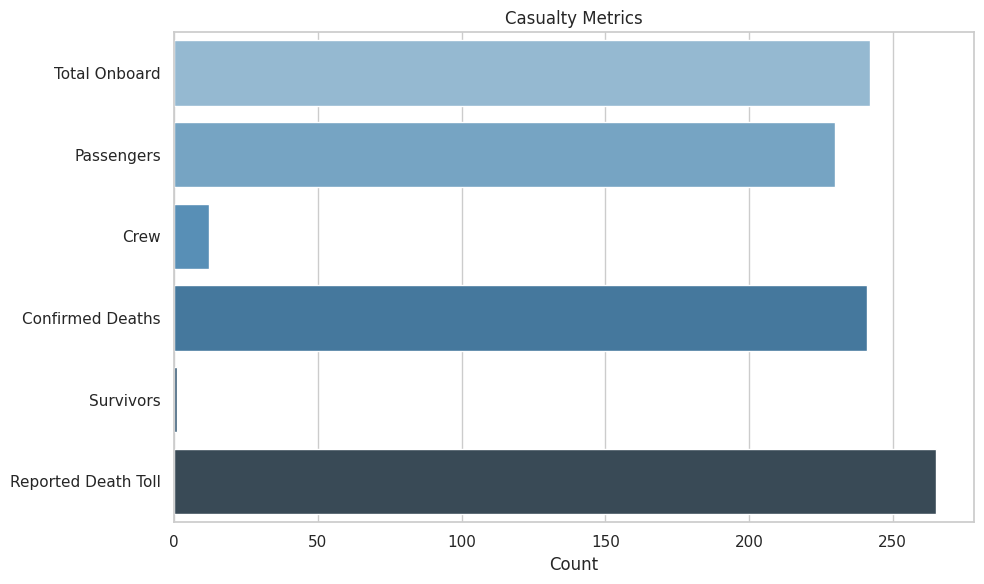

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=[df["Total_People_Onboard"][0], df["Passengers"][0], df["Crew"][0],
       df["Confirmed_Deaths"][0], df["Survivors"][0], df["Death_Toll_Reported"][0]],
    y=["Total Onboard", "Passengers", "Crew", "Confirmed Deaths", "Survivors", "Reported Death Toll"],
    palette="Blues_d"
)
plt.title("Casualty Metrics")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

<ipython-input-24-477688747>:5: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=roles, y=values, join=False, color="crimson", markers="o", scale=1.5)
<ipython-input-24-477688747>:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x=roles, y=values, join=False, color="crimson", markers="o", scale=1.5)


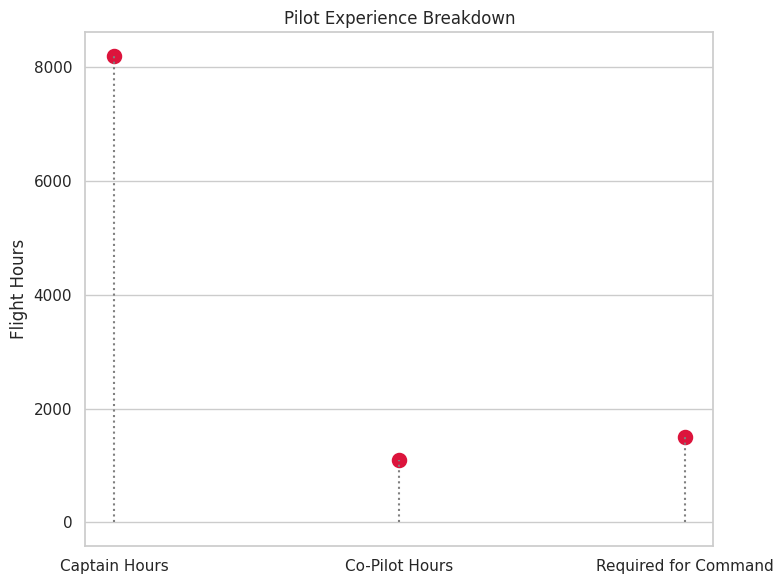

In [24]:
# Pilot Experience
plt.figure(figsize=(8, 6))
roles = ["Captain Hours", "Co-Pilot Hours", "Required for Command"]
values = [df["Captain_Flight_Hours"][0], df["Co_Pilot_Flight_Hours"][0], df["Required_Hours_for_Commander"][0]]
sns.pointplot(x=roles, y=values, join=False, color="crimson", markers="o", scale=1.5)
for i in range(len(roles)):
    plt.vlines(x=i, ymin=0, ymax=values[i], colors="gray", linestyles="dotted")
plt.title("Pilot Experience Breakdown")
plt.ylabel("Flight Hours")
plt.tight_layout()
plt.show()

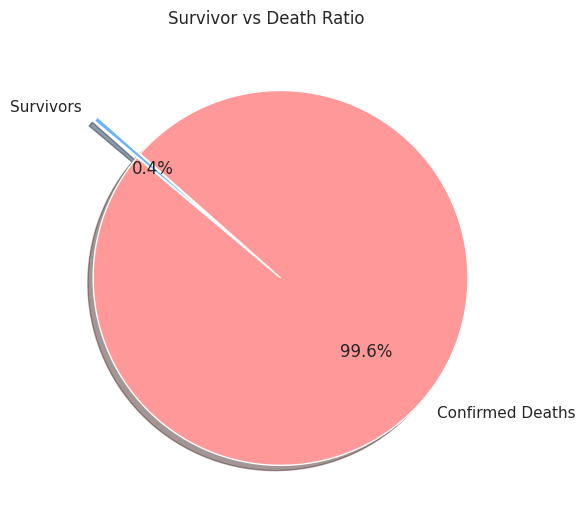

In [25]:
# Survivor vs Death Pie
plt.figure(figsize=(6, 6))
plt.pie(
    [df["Confirmed_Deaths"][0], df["Survivors"][0]],
    labels=["Confirmed Deaths", "Survivors"],
    colors=["#ff9999", "#66b3ff"],
    explode=(0.1, 0.2),
    autopct="%1.1f%%",
    startangle=140,
    shadow=True
)
plt.title("Survivor vs Death Ratio")
plt.tight_layout()
plt.show()

<ipython-input-27-615593352>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resources, y=counts, palette="coolwarm")


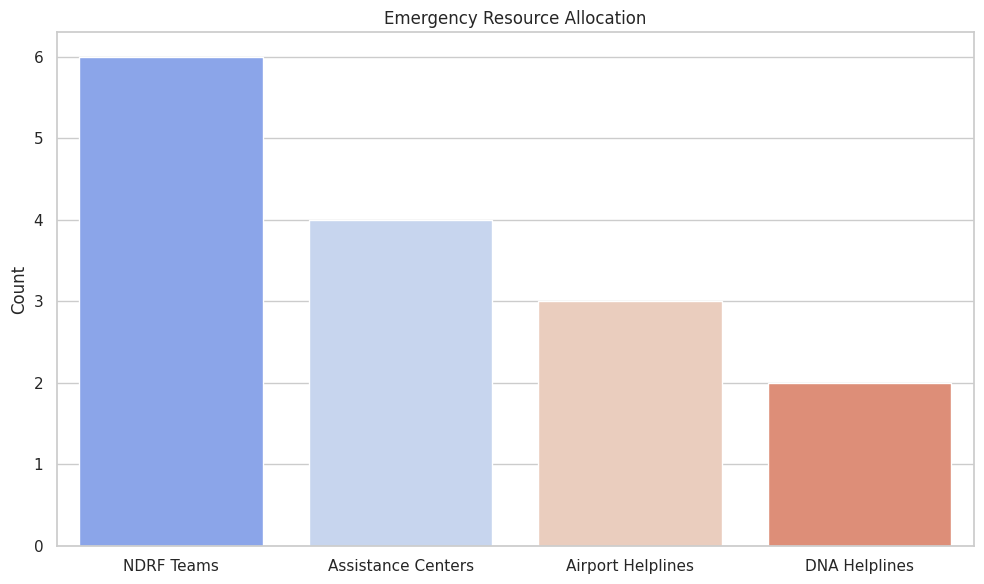

In [27]:
# Emergency Resource Distribution
plt.figure(figsize=(10, 6))
resources = ["NDRF Teams", "Assistance Centers", "Airport Helplines", "DNA Helplines"]
counts = [
    df["NDRF_Teams_Deployed"][0],
    df["Assistance_Centers_Count"][0],
    df["Airport_Helplines_Count"][0],
    df["DNA_Control_Room_Helplines_Count"][0]
]
sns.barplot(x=resources, y=counts, palette="coolwarm")
plt.title("Emergency Resource Allocation")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


<ipython-input-28-3811698831>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


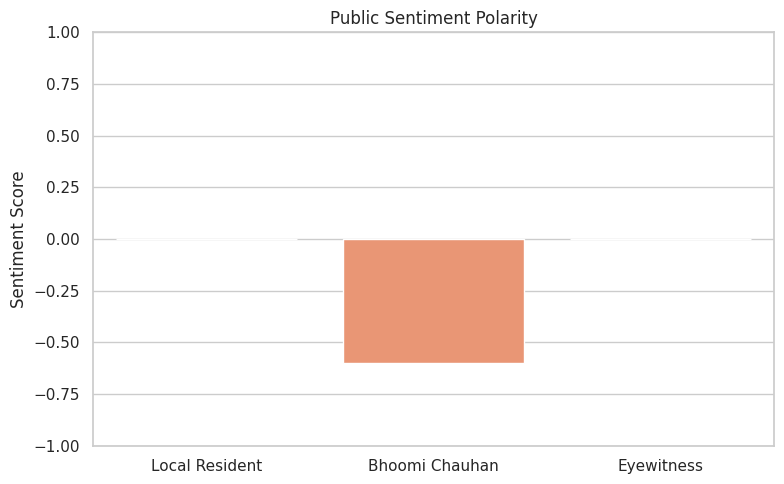

In [28]:
# Public Sentiment Bar
plt.figure(figsize=(8, 5))
sns.barplot(
    x=["Local Resident", "Bhoomi Chauhan", "Eyewitness"],
    y=sentiment_scores,
    palette="Set2"
)
plt.title("Public Sentiment Polarity")
plt.ylabel("Sentiment Score")
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()

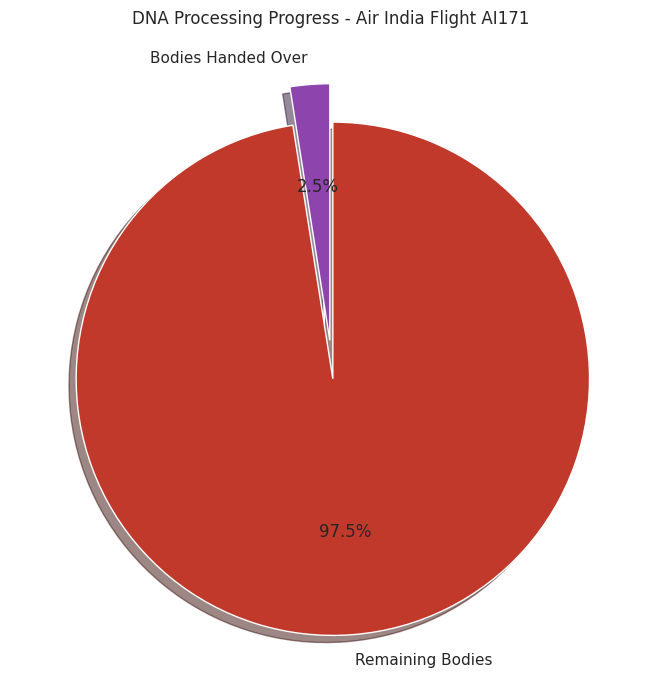

In [29]:
# DNA Processing Progress - Pie Chart
plt.figure(figsize=(7, 7))
labels = ["Bodies Handed Over", "Remaining Bodies"]
values = [df["Bodies_Handed_Over"][0], df["Confirmed_Deaths"][0] - df["Bodies_Handed_Over"][0]]
colors = ["#8e44ad", "#c0392b"]
explode = (0.05, 0.1)
plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90, shadow=True, explode=explode)
plt.title("DNA Processing Progress - Air India Flight AI171")
plt.tight_layout()
plt.show()